<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<h1>Median value of owner-occupied homes</h1>

<AxesSubplot:ylabel='MEDV'>

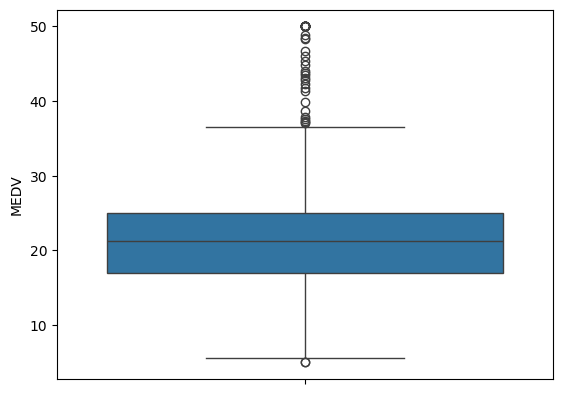

In [6]:
sns.boxplot(y=boston_df["MEDV"])

<h1>Charles river variable</h1>

<AxesSubplot:xlabel='boundary_status', ylabel='count'>

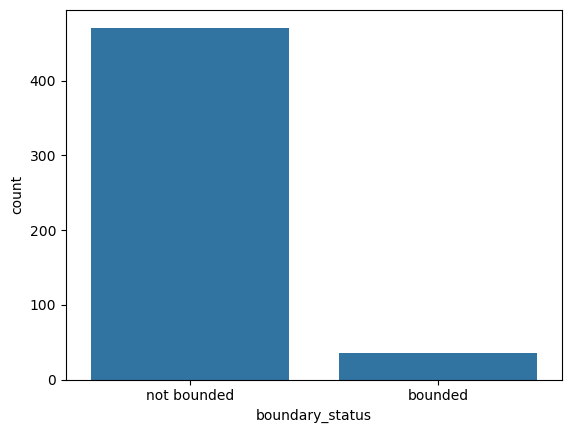

In [7]:
boston_df['boundary_status'] = boston_df['CHAS'].apply(lambda x: 'bounded' if x == 1 else 'not bounded')
boundary_counts = boston_df['boundary_status'].value_counts().reset_index()
boundary_counts.columns = ['boundary_status', 'count']

sns.barplot(x='boundary_status', y='count', data=boundary_counts)

<h1>MEDV variable vs the AGE variable</h1>

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

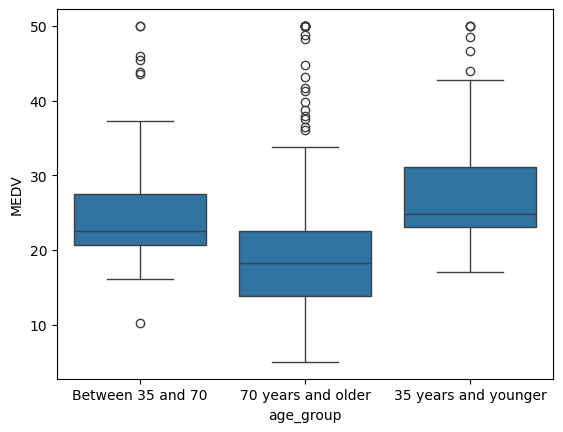

In [8]:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'Between 35 and 70'
boston_df.loc[boston_df['AGE'] > 70, 'age_group'] = '70 years and older'
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

<h1>Scatter plot between Nitric oxide concentrations and the proportion of non-retail business acres per town</h1>

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

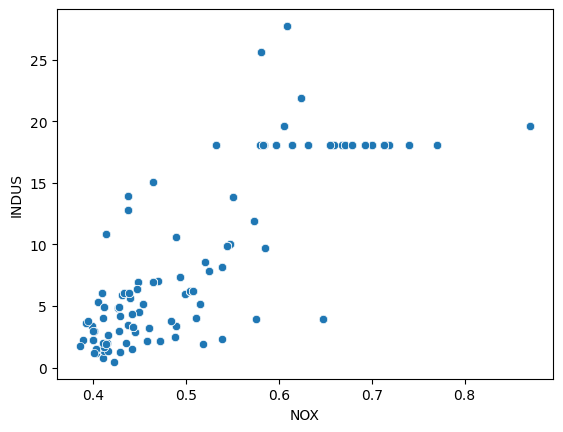

In [9]:

sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"], data=boston_df)


<h1>histogram for the pupil to teacher ratio variable</h1>

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

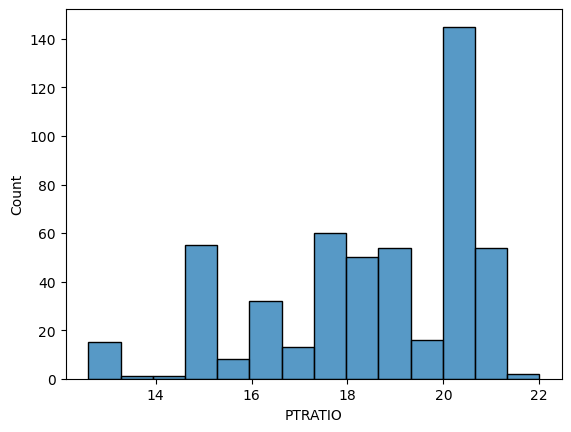

In [10]:
sns.histplot(boston_df['PTRATIO'])

<h1>Is there a significant difference in median value of houses bounded by the Charles river or not?</h1>

Null Hypothesis (H0): There is no significant difference in MEDV across houses bounded by the river.
Alternative Hypothesis (H1): There is diff in MEDV across houses bounded by the river.

In [13]:
group_0 = boston_df[boston_df['CHAS'] == 0]['MEDV'] 
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV'] 
scipy.stats.ttest_ind(group_0, group_1, equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<h4 style="color:red"> p value is larger than alpha, we fail to reject the NULL hypothesis, There is not significant diff</h4>

<h1>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</h1>

Null Hypothesis (H0): There is no significant difference in MEDV between houses built prior and after 1940. <br>
Alternative Hypothesis (H1): there is a significantly different MEDV between houses built proir and after 1940.

make the two different categories

In [21]:
boston_df.loc[(boston_df['AGE'] > 84), 'age_group'] = 'prior to 1940'
boston_df.loc[(boston_df['AGE'] <= 84), 'age_group'] = 'after 1940'

test for equality of variances using levene test

In [22]:
scipy.stats.levene(boston_df[boston_df['age_group'] == 'prior to 1940']['MEDV'],
                   boston_df[boston_df['age_group'] == 'after 1940']['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.4055510245413045, pvalue=0.2363550102480432)

since we checked variance equality, we can make one way ANOVA

In [23]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == 'prior to 1940']['MEDV'], boston_df[boston_df['age_group'] == 'after 1940']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 70.89786758512082, P-Value: 3.9330184294042697e-16


<h4 style="color:red"> p value is larger than alpha, we fail to reject the NULL hypothesis, There is not significant diff</h4>

<h1>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</h1>

null hypothesis: the is no correlation 
alternative hypothesis: there is correlation

In [30]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<h4 style="color:red"> p value is larger than alpha, we fail to reject the NULL hypothesis, There is  no relationship between the two continious variables</h4>

<h1>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</h1>

H0: additional weighted distance have no effect on median value of owner occupied homes.<br>
H1: additional weighted distance have effect on median value of owner occupied homes.

In [36]:
X = boston_df["DIS"]
y = boston_df["MEDV"]
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        10:15:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4 style="color:red"> p value is less than alpha, we reject the null hypthesis  There is  evidence that the ditatnces have effect on median price</h4>